### **K-Means Clustering**

In [72]:
#Group 11
#Sindhu Sheri A20212823
#Tarun Alapati A20218266

In [1]:
!pip install pyspark

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#data file
file = "drive/My Drive/bigdata_assignments/projects/project-3/data.txt"

In [4]:
#packages required
import sys
from pyspark import SparkContext, SparkConf
import numpy as np
import matplotlib as mplib
import matplotlib.pyplot as pl

In [5]:
#creating a spark context 
#sparkcontext.stop()
sparkcontext = SparkContext("local","PySpark k-means clustering")

In [42]:
#constants required
total_iteration = 20
k = 10

In [6]:
#reading the data file & splitting them using space
fileRDD = sparkcontext.textFile(file)
itemset = fileRDD.map(lambda line: [item for item in line.split(' ')])
itemsetNew = itemset.map(lambda x: [float(i) for i in x])

In [35]:
#generating k-random centroids from data
def randomCentroids(itemsetNew,k):
  return itemsetNew.takeSample(False,k)

In [37]:
kCentroids = randomCentroids(itemsetNew,10)

In [38]:
print("Randomly Obtained Centroids")
for i in kCentroids:
  print(i)

Randomly Obtained Centroids
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 3.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.11, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.44, 1.66, 0.0, 1.11, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.11, 0.0, 0.55, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.55, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.018, 12.0, 107.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.74, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.23, 0.0, 0.0, 1.49, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.74, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.109, 0.0, 0.0, 2.263, 24.0, 86.0, 1.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.62, 0.0, 0.0, 0.0, 0.0, 0.92, 0.0, 0.0,

In [30]:
#computing the euclidean distance
def compute_euclidean_distance(a,b):
  sum_of = 0
  for x, y in zip(a, b):
    ans = (x - y)**2
    sum_of += ans
  return (sum_of)**(1/2)

In [24]:
#computing the manhattan distance
def compute_manhattan_distance(a, b):
    sum_of = 0
    for x, y in zip(a, b):
        ans = abs(x-y)
        sum_of += ans
    return (sum_of)**(1/2)

In [31]:
#assign the cluster which has the minimum distance
def assign_label_cluster(distance, data_point, centroids):
  #getting the minimum distance cluster from the dictionary
  minIndex = min(distance, key=distance.get)
  return [minIndex, data_point, distance[minIndex]]

In [48]:
#computing new centroids
def compute_new_centroid(label,centroids):
  res = []
  for j in range(0,10):
    c = []
    x = None
    for i in label:
      if i[0] == j:
        c.append(np.array(i[1]))
    if not c:
      x = centroids[j]
    else:
      x = np.average(c,axis = 0)
    res.append(x)
  return res        

In [56]:
#k-means clustering
def iterative_kmeans_clustering_Eucledian(data_points,centroids):
  #length of the datapoints
  datalength = len(data_points)
  #array to store cost function values
  CostFunArrayEucledian = np.zeros((total_iteration,2))
  #dictionary to store the costfunction for an iteration
  costDictEucledian = dict()
  #constant which keeps the iteration number
  iter_no = 0
  while iter_no < total_iteration:
    #has datapoints and corresponding cluster number
    cluster_label = []
    #incrementing the iteration
    iter_no += 1
    #initializing the summation value for each iteration
    s = 0
    #iterating the datapoints
    for r in range(0, datalength):
      #dictionary to store corresponding distances between k centroids and current data point
      distance = {}
      #for each centroid
      for c in range(0, k):
        distance[c] = compute_euclidean_distance(data_points[r], centroids[c])
      #assigning the cluster to a smallest distance
      label = assign_label_cluster(distance, data_points[r], centroids)
      cluster_label.append(label)
      #updating the summation value
      s = s + (label[2]**2)
    #adding the cost function for an iteration
    costDictEucledian[iter_no] = s  
    CostFunArrayEucledian[iter_no-1,:] = np.array([iter_no, s])
    print("Iteration %.1d : %.2f" %(iter_no,s))
    new_centroids = compute_new_centroid(cluster_label,centroids)
    centroids = new_centroids
  return CostFunArrayEucledian,costDictEucledian


In [57]:
[costFunArrayEucledian,costDictEucledian] = iterative_kmeans_clustering_Eucledian(itemsetNew.collect(),kCentroids)

Iteration 1 : 1658139015.93
Iteration 2 : 1205328991.83
Iteration 3 : 988553404.17
Iteration 4 : 860642648.43
Iteration 5 : 780452306.09
Iteration 6 : 724423632.80
Iteration 7 : 683593403.38
Iteration 8 : 612350881.19
Iteration 9 : 563283869.75
Iteration 10 : 538260917.53
Iteration 11 : 515445177.17
Iteration 12 : 499733355.29
Iteration 13 : 485717260.32
Iteration 14 : 478125376.79
Iteration 15 : 473325651.97
Iteration 16 : 469728487.07
Iteration 17 : 467525834.54
Iteration 18 : 466126195.76
Iteration 19 : 464991413.91
Iteration 20 : 464210629.32


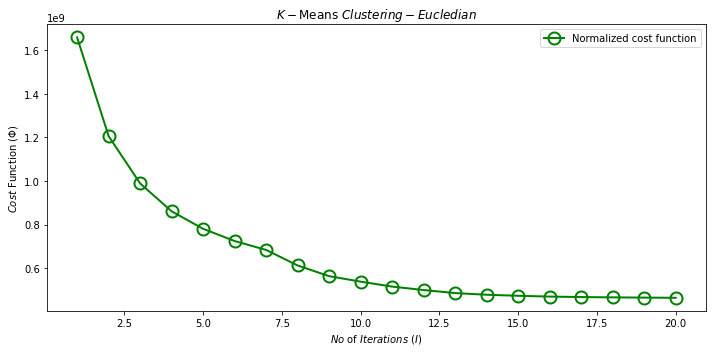

In [67]:
figure1, axes1 = pl.subplots(1,1,figsize=(10,5)) # Specifying the dimensions of graph
# In the below step we assign a line plot for the iterations and the cost function
axes1.plot(costFunArrayEucledian[:,0], costFunArrayEucledian[:,1], 'go-', linewidth = 2, markersize = 12, markeredgewidth = 2, label = 'Normalized cost function', fillstyle = 'none')
axes1.set_xlabel("$No$ of $Iterations$ $(I)$") # Setting the x-label to no.of iterations
axes1.set_ylabel("$Cost$ Function $(Φ)$") # Setting the y-label to cost function of eucledian
axes1.set_title("$K-$Means $Clustering-Eucledian$") # Assigning the title for the graph
axes1.legend(loc=0)
figure1.tight_layout() # Adjusts the graph to a tight layout
pl.show() # Displays the plot

In [61]:
#k-means clustering
def iterative_kmeans_clustering_Manhattan(data_points,centroids):
  #length of the datapoints
  datalength = len(data_points)
  #array to store cost function values
  CostFunArrayManhattan = np.zeros((total_iteration,2))
  #dictionary to store the costfunction for an iteration
  costDictManhattan = dict()
  #constant which keeps the iteration number
  iter_no = 0
  while iter_no < total_iteration:
    #has datapoints and corresponding cluster number
    cluster_label = []
    #incrementing the iteration
    iter_no += 1
    #initializing the summation value for each iteration
    s = 0
    #iterating the datapoints
    for r in range(0, datalength):
      #dictionary to store corresponding distances between k centroids and current data point
      distance = {}
      #for each centroid
      for c in range(0, k):
        distance[c] = compute_manhattan_distance(data_points[r], centroids[c])
      #assigning the cluster to a smallest distance
      label = assign_label_cluster(distance, data_points[r], centroids)
      cluster_label.append(label)
      #updating the summation value
      s = s + (label[2]**2)
    #adding the cost function for an iteration
    costDictManhattan[iter_no] = s  
    CostFunArrayManhattan[iter_no-1,:] = np.array([iter_no, s])
    print("Iteration %.1d : %.2f" %(iter_no,s))
    new_centroids = compute_new_centroid(cluster_label,centroids)
    centroids = new_centroids
  return CostFunArrayManhattan,costDictManhattan


In [62]:
[CostFunArrayManhattan,costDictManhattan] = iterative_kmeans_clustering_Manhattan(itemsetNew.collect(),kCentroids)

Iteration 1 : 1002533.34
Iteration 2 : 808093.63
Iteration 3 : 711667.98
Iteration 4 : 671385.33
Iteration 5 : 640991.72
Iteration 6 : 622062.76
Iteration 7 : 596717.69
Iteration 8 : 553042.98
Iteration 9 : 538075.99
Iteration 10 : 533881.42
Iteration 11 : 532829.49
Iteration 12 : 535445.75
Iteration 13 : 533028.40
Iteration 14 : 527225.97
Iteration 15 : 518471.94
Iteration 16 : 510980.64
Iteration 17 : 506109.56
Iteration 18 : 504780.13
Iteration 19 : 505071.14
Iteration 20 : 503944.00


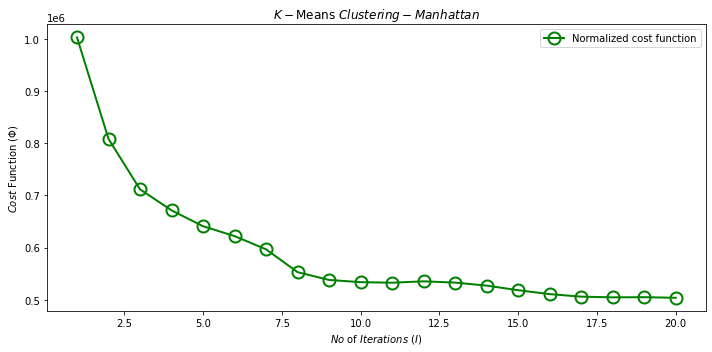

In [68]:
figure1, axes1 = pl.subplots(1,1,figsize=(10,5)) # Specifying the dimensions of graph
# In the below step we assign a line plot for the iterations and the cost function
axes1.plot(CostFunArrayManhattan[:,0], CostFunArrayManhattan[:,1], 'go-', linewidth = 2, markersize = 12, markeredgewidth = 2, label = 'Normalized cost function', fillstyle = 'none')
axes1.set_xlabel("$No$ of $Iterations$ $(I)$") # Setting the x-label to no.of iterations
axes1.set_ylabel("$Cost$ Function $(Φ)$") # Setting the y-label to cost function of eucledian
axes1.set_title("$K-$Means $Clustering-Manhattan$") # Assigning the title for the graph
axes1.legend(loc=0)
figure1.tight_layout() # Adjusts the graph to a tight layout
pl.show() # Displays the plot

In [69]:
#printing the cost functions
print(costDictEucledian)
print(costDictManhattan)

{1: 1658139015.9254603, 2: 1205328991.8338356, 3: 988553404.1748053, 4: 860642648.4251981, 5: 780452306.0931883, 6: 724423632.802921, 7: 683593403.3823783, 8: 612350881.1905221, 9: 563283869.7487906, 10: 538260917.5276138, 11: 515445177.1698846, 12: 499733355.2913053, 13: 485717260.31953835, 14: 478125376.78529555, 15: 473325651.9675424, 16: 469728487.069019, 17: 467525834.53581357, 18: 466126195.75919896, 19: 464991413.9116552, 20: 464210629.3155552}
{1: 1002533.3389999999, 2: 808093.6332885546, 3: 711667.9799896402, 4: 671385.32770694, 5: 640991.7176740178, 6: 622062.7618898947, 7: 596717.6879420816, 8: 553042.9805544973, 9: 538075.9884025021, 10: 533881.4182754003, 11: 532829.4913945876, 12: 535445.7479856211, 13: 533028.4048830118, 14: 527225.9688532173, 15: 518471.9448015737, 16: 510980.64071232354, 17: 506109.5560240771, 18: 504780.1303604521, 19: 505071.1357258232, 20: 503943.9962593126}


In [70]:
# cost function for eucledian distance
costEucledianPercentage = ((costDictEucledian[1] - costDictEucledian[10])/(costDictEucledian[1])) * 100
costEucledianPercentage

67.53825147602639

In [71]:
# cost function for manhattan distance
costManhattanPercentage = ((costDictManhattan[1] - costDictManhattan[10])/(costDictManhattan[1])) * 100
costManhattanPercentage

46.746766665342754